# CSMAD21 - Applied Data Science with Python - Practical 5

## Data Visualisation

Follow the instructions to complete each of these tasks, and use the testing code cells to check your answers. This set of exercises focuses on Data Visualisation with pandas, matplotlib and/or seaborn.

**Questions marked with a * are extra challenging**

The relevant materials for these exercises is lectures 10.

This is not assessed but will help you gain practical experience for the exam and coursework.

You will need to download some of the csv data set files from the module Blackboard page and place them in the same folder as this notebook. Run the cell below to load all of the necessary Python modules.


In [2]:
%matplotlib inline
# You can also use %matplotlib notebook to get an interactive display
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import requests

#### 1.1

Load the economicsLong.csv file as a pandas data frame, and use pandas to create a line plot of each pce variable (value and value01) over time.

In [52]:
eco=pd.read_csv('Datasets/economicsLong.csv', parse_dates=['date'],index_col=['date'])
eco.head()

,variable,value,value01
date,,,
1967-01-07,pce,507.4,0.000000
1967-01-08,pce,510.5,0.000266
1967-01-09,pce,516.3,0.000764
1967-01-10,pce,512.9,0.000472
1967-01-11,pce,518.1,0.000918


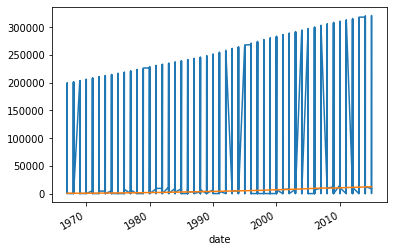

In [53]:
eco.value.plot.line()
eco.loc[eco['variable'] == 'pce', 'value'].plot.line()

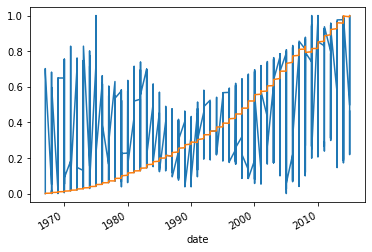

In [54]:
eco.value01.plot.line()
eco.loc[eco['variable'] == 'pce', 'value01'].plot.line()

#### 1.2

Create a bar plot showing the mean number of available bikes in each zip code in the bikes data.

In [55]:
# Load the bikes data
indego_bikes_url = ("https://www.rideindego.com/stations/json/")
headers = {'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:63.0) Gecko/20100101 Firefox/63.0"}
indego_bikes_data = requests.get(indego_bikes_url,headers=headers)
bikes = json_normalize(indego_bikes_data.json()['features'])
bikes.head()

C:\Users\chand\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,type,geometry.coordinates,geometry.type,properties.id,properties.name,properties.coordinates,properties.totalDocks,properties.docksAvailable,properties.bikesAvailable,properties.classicBikesAvailable,...,properties.isEventBased,properties.isVirtual,properties.kioskId,properties.notes,properties.openTime,properties.publicText,properties.timeZone,properties.trikesAvailable,properties.latitude,properties.longitude
0,Feature,"[-75.16374, 39.95378]",Point,3004,Municipal Services Building Plaza,"[-75.16374, 39.95378]",30,26,4,4,...,False,False,3004,None,None,,None,0,39.95378,-75.16374
1,Feature,"[-75.14403, 39.94733]",Point,3005,"Welcome Park, NPS","[-75.14403, 39.94733]",13,10,3,3,...,False,False,3005,None,None,,None,0,39.94733,-75.14403
2,Feature,"[-75.20311, 39.9522]",Point,3006,40th & Spruce,"[-75.20311, 39.9522]",17,17,0,0,...,False,False,3006,None,None,,None,0,39.95220,-75.20311
3,Feature,"[-75.15993, 39.94517]",Point,3007,"11th & Pine, Kahn Park","[-75.15993, 39.94517]",20,1,15,11,...,False,False,3007,None,None,,None,0,39.94517,-75.15993
4,Feature,"[-75.15114, 39.97944]",Point,3008,Temple University Station,"[-75.15114, 39.97944]",19,8,5,1,...,False,False,3008,None,None,,None,0,39.97944,-75.15114


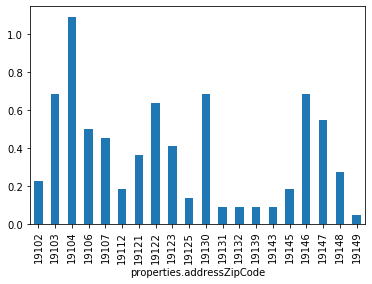

In [56]:
bikesavail= pd.crosstab(bikes['properties.bikesAvailable'],bikes['properties.addressZipCode'])
bikesavail.mean().plot(kind='bar')

#### 1.3

Load the iris.csv data and create a box and whisker plot showing the distribution of sepal length for each of the three species.

In [67]:
iris=pd.read_csv('Datasets/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


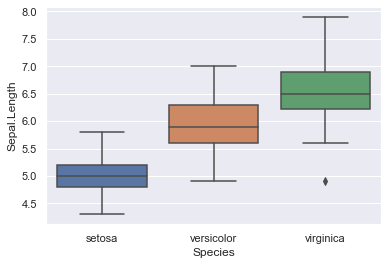

In [70]:
petalLength = pd.crosstab( iris['Sepal.Length'],iris['Species'])
petalLength.head()
sns.boxplot(x='Species', y='Sepal.Length', data=iris)

#### 1.4

Look at the faithful.csv data, which gives a list of eruptions of a geyser in Yellowstone national park in the USA. The eruptions variable gives the length of the eruption, while the waiting variable gives the waiting time until the next eruption.

Explore the data by looking at the distribution of the two variables, and how they vary together. What do you notice about the distribution of the individual variables, and how they are related?

In [89]:
faithful=pd.read_csv('Datasets/faithful.csv')
faithful.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


(array([45., 36., 13.,  3.,  4., 12., 29., 52., 54., 24.]),
 array([1.6 , 1.95, 2.3 , 2.65, 3.  , 3.35, 3.7 , 4.05, 4.4 , 4.75, 5.1 ]),
 <BarContainer object of 10 artists>)

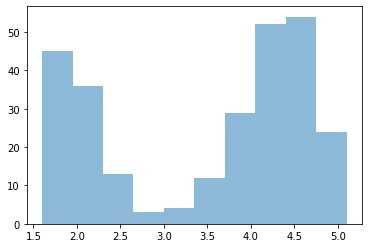

In [90]:
plt.hist(faithful['eruptions'], bins=10, alpha=0.5)

(array([16., 28., 26., 24.,  9., 23., 62., 55., 23.,  6.]),
 array([43. , 48.3, 53.6, 58.9, 64.2, 69.5, 74.8, 80.1, 85.4, 90.7, 96. ]),
 <BarContainer object of 10 artists>)

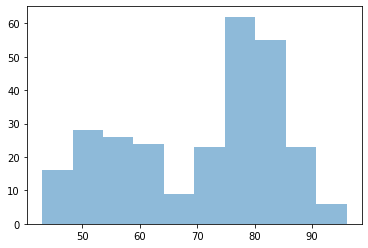

In [91]:
plt.hist(faithful['waiting'], bins=10, alpha=0.5)

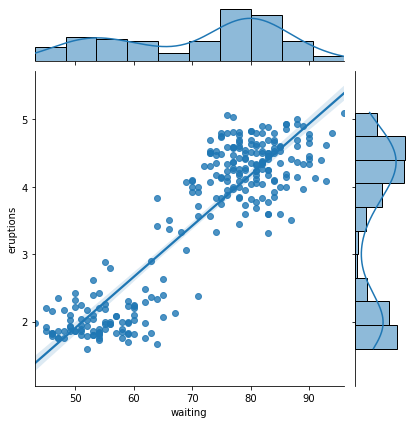

In [92]:
sns.jointplot(x='waiting',y='eruptions',data=faithful, kind='reg')

#### 1.5

Experiment with plotting the diamonds.csv data using matplotlib and seaborn to explore how depth and table relate to cut. Additionally, create a plot of the price against the carat to see how the price varies.

In [46]:
diamonds=pd.read_csv('Datasets/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


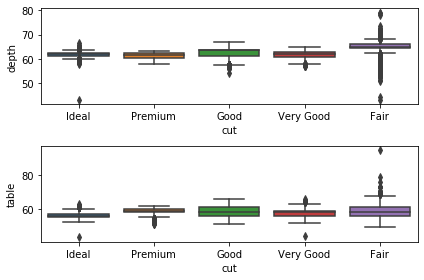

In [47]:
plt.subplot(2,1,1,)
sns.boxplot(x='cut', y='depth', data=diamonds)
plt.subplot(2,1,2)
sns.boxplot(x='cut', y='table', data=diamonds)
plt.tight_layout()

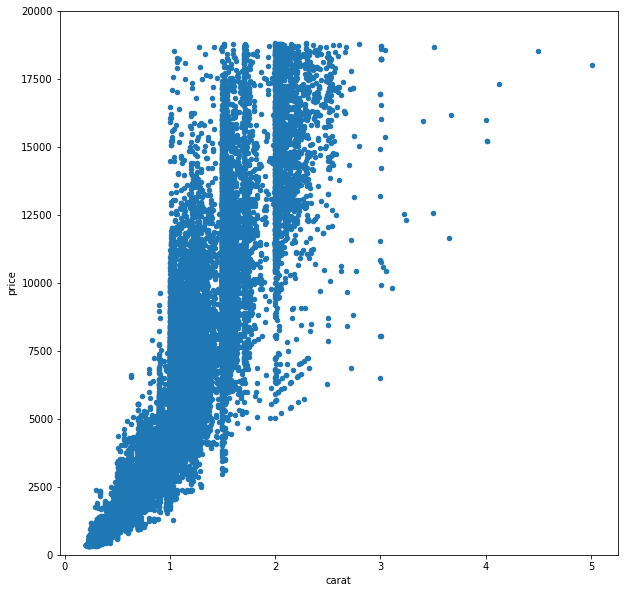

In [50]:
diamonds.plot(kind="scatter",     # Create a scatterplot
              x="carat",          # Put carat on the x axis
              y="price",          # Put price on the y axis
              figsize=(10,10),
              ylim=(0,20000))  

#### 1.6

The longley.csv data set contains several economical variables measured over several years. The variables are:

 - GNP.deflator: GNP implicit price deflator (a measure of inflation)
 - GNP: Gross National Product.
 - Unemployed: number of unemployed.
 - Armed.Forces: number of people in the armed forces.
 - Population: population with age older than 14.
 - Year: the year
 - Employed: number of people employed.
 
Explore the data and find which variables appear to be related.

__Notes:__

- Take a look to the correlation function in the following link to review the relationship between variables.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

- A good way to visualise correlation is with a heatmaps. Please take a look to the following link so you can present the correlation between variables with this kind of graph.

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [5]:
longley=pd.read_csv('Datasets/longley.csv')
longley.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


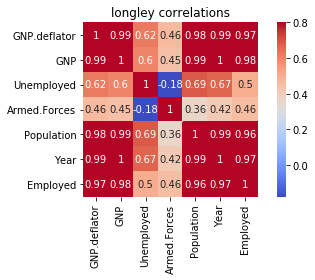

In [6]:
matrix1=longley.corr()
sns.heatmap(matrix1, vmax=.8, square=True, cmap='coolwarm',annot=True)
plt.title('longley correlations')
plt.tight_layout()